In [234]:
# Import stuff

from keras.models import Sequential, load_model
from keras.layers import Activation, Conv2D, Dense, Dropout, Flatten, MaxPooling2D, LeakyReLU
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50
from keras.utils import np_utils

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
import scipy.io as sio


import PIL
import os
import shutil

In [235]:
df = pd.read_csv('all_images').drop(columns ='Unnamed: 0')
df.head()

,Image,class_num,bbox0,bbox1,bbox2,bbox3,Full Name,Year,Make,Model,Body Style,filepath
0,00001.jpg,14,39,116,569,375,Audi TTS Coupe 2012,2012,Audi,TTS,Coupe,train00001.jpg
1,00002.jpg,3,36,116,868,587,Acura TL Sedan 2012,2012,Acura,TL,Sedan,train00002.jpg
2,00003.jpg,91,85,109,601,381,Dodge Dakota Club Cab 2007,2007,Dodge,Dakota,Pickup,train00003.jpg
3,00004.jpg,134,621,393,1484,1096,Hyundai Sonata Hybrid Sedan 2012,2012,Hyundai,Sonata,Sedan,train00004.jpg
4,00005.jpg,106,14,36,133,99,Ford F-450 Super Duty Crew Cab 2012,2012,Ford,F-450,Pickup,train00005.jpg


In [236]:
counter = 4
bodystyle = df['Body Style'].unique().tolist()[counter]

df = df[df['Body Style'] == bodystyle]

bodystyle

'SUV'

In [237]:
df_train,  df_test = train_test_split(df, test_size = .4, stratify = df['Make'])

df_train.reset_index(inplace=True)
df_test.reset_index(inplace=True)

num_classes = len(df['Make'].unique())

In [238]:
datagen = image.ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization = True,
    rescale = 1./255,
    rotation_range=10.,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)

data_set_train = datagen.flow_from_dataframe(df_train, 'Documents/DSI-US-5/Capstone/all/', 'filepath', 'Make',  target_size = (196, 196), batch_size = 32, color_mode='grayscale')
data_set_test = datagen.flow_from_dataframe(df_test, 'Documents/DSI-US-5/Capstone/all', 'filepath', 'Make',  target_size = (196, 196), batch_size = 32, color_mode='grayscale')

Found 1860 images belonging to 19 classes.
Found 1241 images belonging to 19 classes.


'Toyota'

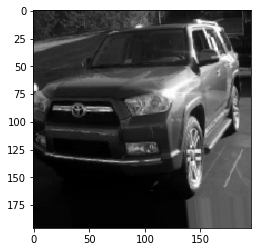

In [240]:
i =np.random.randint(0,32)
j = np.random.randint(0,32)

plt.imshow(data_set_train[i][0][j].reshape(196, 196), cmap=plt.get_cmap('gray'));

list(data_set_train.class_indices.keys())[data_set_train[i][1][j].tolist().index(1)]

In [241]:
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), activation='linear', input_shape = (196, 196, 1)))
classifier.add(LeakyReLU())
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.7))

classifier.add(Conv2D(32, (6, 3), activation='linear'))
classifier.add(LeakyReLU())
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.7))

classifier.add(Conv2D(32, (3, 6), activation='linear'))
classifier.add(LeakyReLU())
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.7))

classifier.add(Conv2D(32, (3, 3), activation='linear'))
classifier.add(LeakyReLU())
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.7))

classifier.add(Flatten())

classifier.add(Dense(num_classes*5, activation='linear'))
classifier.add(LeakyReLU())
classifier.add(Dropout(0.7))

classifier.add(Dense(num_classes, activation='relu'))

classifier.add(Dense(units = num_classes, activation='softmax'))

classifier.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [110]:
classifier = load_model('model_bodystyle' + bodystyle)

In [242]:
classifier.fit_generator(data_set_train, epochs = 10, steps_per_epoch = len(data_set_train), validation_data=data_set_test, validation_steps = len(data_set_test))

Epoch 1/10
59/59 [==============================] - 36s 615ms/step - loss: 3.4141 - acc: 0.0588 - val_loss: 2.9468 - val_acc: 0.0612
Epoch 2/10
59/59 [==============================] - 28s 476ms/step - loss: 2.9212 - acc: 0.0805 - val_loss: 2.9422 - val_acc: 0.0564
Epoch 3/10
59/59 [==============================] - 29s 498ms/step - loss: 2.9074 - acc: 0.0864 - val_loss: 2.9490 - val_acc: 0.0290
Epoch 4/10
59/59 [==============================] - 28s 483ms/step - loss: 2.8635 - acc: 0.1027 - val_loss: 2.9608 - val_acc: 0.0298
Epoch 5/10
59/59 [==============================] - 29s 485ms/step - loss: 2.8496 - acc: 0.1207 - val_loss: 2.9710 - val_acc: 0.0290
Epoch 6/10
59/59 [==============================] - 29s 489ms/step - loss: 2.8373 - acc: 0.1234 - val_loss: 2.9693 - val_acc: 0.0306
Epoch 7/10
59/59 [==============================] - 28s 475ms/step - loss: 2.8254 - acc: 0.1192 - val_loss: 2.9795 - val_acc: 0.0395
Epoch 8/10
59/59 [==============================] - 29s 496ms/step - 

In [189]:
classifier.save('model_bodystyle' + bodystyle)

,0
BMW,1.000000e+00
Volvo,1.481149e-08
Infiniti,1.837562e-09
HUMMER,6.449686e-10
Ford,2.190213e-11


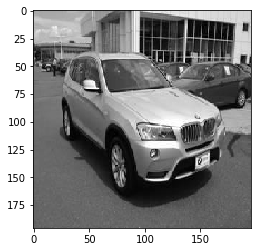

In [265]:
randomnum = np.random.randint(0, len(df))

test_image = image.load_img('Documents/DSI-US-5/Capstone/all/'+df['filepath'].tolist()[randomnum], target_size=(196,196), color_mode='grayscale')

plt.imshow(test_image);

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
pd.DataFrame(result[0],data_set_test.class_indices).sort_values(0, ascending = False).head()


In [ ]:
'''classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), activation='relu', input_shape = (256, 256, 1)))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.25))

#classifier.add(Conv2D(64, (3, 3), activation='relu'))
#classifier.add(Conv2D(64, (3, 3), activation='relu'))
#classifier.add(MaxPooling2D(pool_size=(2, 2)))
#classifier.add(Dropout(0.25))

classifier.add(Conv2D(32, (3, 3), activation='relu'))
#classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.25))

classifier.add(Flatten())
classifier.add(Dense(512, activation='relu'))
#classifier.add(Dropout(0.1))
classifier.add(Dense(units = 9, activation='softmax'))

classifier.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])'''